## Car Brand classification with Transfer Learning using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 180 images belonging to 4 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 74 images belonging to 4 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Billy Gareth\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
6/6 [==============================] - 69s 9s/step - loss: 7.0924 - accuracy: 0.3000 - val_loss: 4.8489 - val_accuracy: 0.3919
Epoch 2/50
6/6 [==============================] - 43s 7s/step - loss: 6.2311 - accuracy: 0.2529 - val_loss: 1.6098 - val_accuracy: 0.4595
Epoch 3/50
6/6 [==============================] - 42s 7s/step - loss: 2.7151 - accuracy: 0.3573 - val_loss: 2.5336 - val_accuracy: 0.3243
Epoch 4/50
6/6 [==============================] - 45s 8s/step - loss: 2.0529 - accuracy: 0.3834 - val_loss: 2.3207 - val_accuracy: 0.3784
Epoch 5/50
6/6 [==============================] - 47s 8s/step - loss: 1.6552 - accuracy: 0.4455 - val_loss: 2.7917 - val_accuracy: 0.3243
Epoch 6/50
6/6 [==============================] - 44s 7s/step - loss: 1.7675 - accuracy: 0.3393 - val_loss: 2.3468 - val_accuracy: 0.2838
Epoch 7/50
6/6 [==============================] - 47s 8s/step - loss: 1.5614 - accuracy: 0.3830 - val_loss: 2.4970 - val_accuracy: 0.2838
Epoch 8/50
6/6 [==================

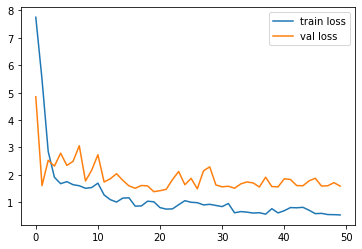

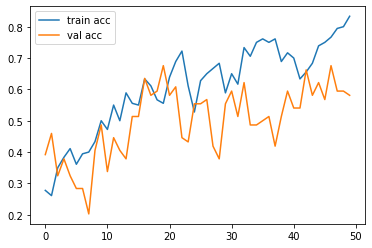

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [16]:
y_pred = model.predict(test_set)

In [17]:
y_pred

array([[4.35736403e-02, 1.55548885e-01, 6.58730924e-01, 1.42146453e-01],
       [1.48163857e-02, 2.26418778e-01, 2.24144563e-01, 5.34620285e-01],
       [6.88834209e-03, 9.62841809e-01, 6.70995330e-03, 2.35599373e-02],
       [1.49493590e-02, 1.61408588e-01, 3.08426887e-01, 5.15215099e-01],
       [2.64318916e-03, 6.93253696e-01, 2.69780427e-01, 3.43227684e-02],
       [2.13007545e-04, 1.74747985e-02, 1.10062867e-01, 8.72249305e-01],
       [1.69326663e-02, 5.29287219e-01, 6.85905889e-02, 3.85189503e-01],
       [1.99397732e-06, 2.04870648e-05, 1.24057202e-04, 9.99853492e-01],
       [8.76814034e-03, 1.17254222e-03, 5.29443264e-01, 4.60616022e-01],
       [4.06947672e-01, 1.93142489e-01, 1.37297899e-01, 2.62611896e-01],
       [3.87795717e-02, 6.94024742e-01, 7.51668066e-02, 1.92028761e-01],
       [6.41468912e-02, 5.99072039e-01, 1.72503784e-01, 1.64277285e-01],
       [2.03524437e-03, 1.95449814e-02, 8.57034624e-01, 1.21385157e-01],
       [5.29894531e-01, 8.93587098e-02, 1.36841433e

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([2, 3, 1, 3, 1, 3, 1, 3, 2, 0, 1, 1, 2, 0, 2, 2, 3, 3, 3, 3, 2, 2,
       2, 3, 2, 2, 3, 3, 1, 3, 3, 1, 3, 2, 3, 2, 3, 0, 1, 0, 2, 1, 2, 2,
       1, 3, 2, 3, 3, 2, 3, 3, 1, 2, 0, 1, 2, 2, 3, 0, 3, 1, 2, 2, 2, 2,
       1, 1, 3, 0, 1, 3, 3, 2], dtype=int64)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('model_resnet50.h5')

In [23]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [24]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [25]:
x.shape

(224, 224, 3)

In [26]:
x=x/255

In [27]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
model.predict(img_data)

array([[7.0275687e-06, 9.8063815e-01, 4.0738269e-05, 1.9314146e-02]],
      dtype=float32)

In [29]:
a=np.argmax(model.predict(img_data), axis=1)

In [30]:
a==1

array([ True])